## Pump it Up: Data Mining the Water Table

## 1) Data Loading

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv('Training_set_values.csv')

In [74]:
label = pd.read_csv('Training_set_labels.csv')
label

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional
...,...,...
59395,60739,functional
59396,27263,functional
59397,37057,functional
59398,31282,functional


In [75]:
merge = pd.merge(train,label, on="id", how="outer")

water_table = merge

water_table

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [76]:
water_table.columns.values

array(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code',
       'lga', 'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group',
       'payment', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'], dtype=object)

## 2) Analyze by Describing Data

In [77]:
water_table.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [78]:
water_table.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [79]:
water_table.describe(include=['O'])

,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,public_meeting,recorded_by,scheme_management,scheme_name,permit,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
count,59400,55763,55745,59398,59400,59029,59400,59400,59400,56066,59400,55522,30590,56344,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1896,2145,37399,9,19287,21,125,2092,2,1,11,2695,2,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6,3
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,True,GeoData Consultants Ltd,VWC,K,True,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
freq,572,9084,17402,3563,10248,508,5294,2503,307,51011,59400,36793,682,38852,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625,32259


In [80]:
water_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55763 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59398 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [81]:
water_table.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3637
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3878
scheme_name              28810
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [82]:
total_null = water_table.isnull().sum() * 100 / len(water_table)
print(total_null)

id                        0.000000
amount_tsh                0.000000
date_recorded             0.000000
funder                    6.122896
gps_height                0.000000
installer                 6.153199
longitude                 0.000000
latitude                  0.000000
wpt_name                  0.003367
num_private               0.000000
basin                     0.000000
subvillage                0.624579
region                    0.000000
region_code               0.000000
district_code             0.000000
lga                       0.000000
ward                      0.000000
population                0.000000
public_meeting            5.612795
recorded_by               0.000000
scheme_management         6.528620
scheme_name              48.501684
permit                    5.144781
construction_year         0.000000
extraction_type           0.000000
extraction_type_group     0.000000
extraction_type_class     0.000000
management                0.000000
management_group    

In [83]:
total_cero = (water_table[['amount_tsh', 'gps_height', 'longitude', 'latitude', 'region_code', 'district_code', 'population']] == 0).mean() * 100
print(total_cero)

amount_tsh       70.099327
gps_height       34.407407
longitude         3.050505
latitude          0.000000
region_code       0.000000
district_code     0.038721
population       35.994949
dtype: float64


### 3) Data Cleaning

In [84]:
water_table_longitude_cero = water_table.query('longitude == 0')
water_table_longitude_cero

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
21,6091,0.0,2013-02-10,Dwsp,0,DWE,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Ibabachegu,Shinyanga,17,1,Bariadi,Ikungulyabashashi,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,swn 80,swn 80,handpump,wug,user-group,unknown,unknown,unknown,unknown,unknown,unknown,shallow well,shallow well,groundwater,hand pump,hand pump,functional
53,32376,0.0,2011-08-01,Government Of Tanzania,0,Government,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Center,Mwanza,19,6,Geita,Nyang'hwale,0,True,GeoData Consultants Ltd,VWC,Nyang'hwale,True,0,submersible,submersible,submersible,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
168,72678,0.0,2013-01-30,Wvt,0,WVT,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Ilula,Shinyanga,17,1,Bariadi,Chinamili,0,False,GeoData Consultants Ltd,Parastatal,NaN,False,0,gravity,gravity,gravity,parastatal,parastatal,other,other,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
177,56725,0.0,2013-01-17,Netherlands,0,DWE,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Mahaha,Shinyanga,17,1,Bariadi,Bunamhala,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,other,other,other,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other,non functional
253,13042,0.0,2012-10-29,Hesawa,0,DWE,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Nyamatala,Mwanza,19,2,Magu,Malili,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59189,62177,0.0,2011-07-18,Dwsp,0,DWE,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Mwamabuli,Shinyanga,17,1,Bariadi,Mhunze,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,other,other,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
59208,3631,0.0,2013-01-22,Dwsp,0,DWE,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Mbiti,Shinyanga,17,1,Bariadi,Kinang'weli,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59295,60843,0.0,2011-07-19,Rwssp,0,DWE,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Mwamalizi,Shinyanga,17,1,Bariadi,Chinamili,0,True,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair
59324,748,0.0,2013-01-22,World Vision,0,World Vision,0.0,-2.000000e-08,Mwazwilo,0,Lake Victoria,Mbita,Shinyanga,17,1,Bariadi,Mbita,0,NaN,GeoData Consultants Ltd,WUG,NaN,False,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [85]:
zero_sum = (water_table['longitude'] == 0).sum()
total_rows = len(water_table)

percentage_zero = (zero_sum / total_rows) * 100

print(f"Sum of zero values in longitude is: {zero_sum}")
print(f"Percentage of zero values is: {percentage_zero:.2f}%")

Sum of zero values in longitude is: 1812
Percentage of zero values is: 3.05%


In [86]:
# "I have implemented a loop that filters data based on the 'region_code' (which is defined in the dataset from 1 to 99) and assigns the mean of each region to the values of 0 in the 'longitude' column."
pd.set_option('display.max_columns', None)

for i in range(1, 100):
    region_index = water_table.query(f'region_code == {i}').copy()
    x = region_index.loc[region_index['longitude'] != 0, 'longitude'].mean()
    region_index['longitude'].replace(0, x, inplace=True)  # Use inplace=True to modify the original DataFrame
    water_table.loc[water_table['region_code'] == i, 'longitude'] = region_index['longitude']

water_table_longitude_cero2 = water_table.query('longitude == 0')
water_table_longitude_cero2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group


In [87]:
water_table

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


In [88]:
water_table["Population_Range"] = water_table["population"]

water_table["Population_Range"] = pd.to_numeric(water_table["Population_Range"], errors='coerce')

conditions = [
    (water_table["Population_Range"] < 100),
    ((water_table["Population_Range"] >= 100) & (water_table["Population_Range"] <= 500)),
    ((water_table["Population_Range"] > 500) & (water_table["Population_Range"] <= 1000)),
    ((water_table["Population_Range"] > 1000) & (water_table["Population_Range"] <= 1500)),
    ((water_table["Population_Range"] > 1500) & (water_table["Population_Range"] <= 10000)),
    ((water_table["Population_Range"] > 10000) & (water_table["Population_Range"] <= 15000)),
    (water_table["Population_Range"] > 15000)
]
 

choices = [
    "Population less than 100",
    "Population between 100 to 500",
    "Population between 501 to 1000",
    "Population between 1001 to 1500",
    "Population between 1501 to 10000",
    "Population between 10001 to 15000",
    "Population more than 15000",
]

## To handle easier the conditional assignament I use the function np.select(), it is going to assign a value according the condition.
water_table["Population_Range"] = np.select(conditions, choices, default="No Identified")


water_table


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Population_Range
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population between 100 to 500
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Population between 100 to 500
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,Population less than 100
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population less than 100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,Population less than 100
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,Population less than 100
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,use

In [89]:
water_table["public_meeting"].replace(pd.NA,"Not Specified", inplace=True)
water_table["public_meeting"]

0                 True
1        Not Specified
2                 True
3                 True
4                 True
             ...      
59395             True
59396             True
59397             True
59398             True
59399             True
Name: public_meeting, Length: 59400, dtype: object

In [90]:
##pd.reset_option('display.max_columns',)
pd.set_option('display.max_columns', None)
water_table["permit"].replace(pd.NA,"Not Specified", inplace=True)
query = water_table.query('permit == "Not Specified"')
query

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Population_Range
43,19282,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,Internal,Mwarufyu,Singida,13,2,Singida Rural,Merya,1,True,GeoData Consultants Ltd,VWC,K,Not Specified,1980,mono,mono,motorpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,Population less than 100
47,13620,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,Lake Nyasa,Mpandapanda,Mbeya,12,4,Rungwe,Kiwira,0,True,GeoData Consultants Ltd,VWC,K,Not Specified,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population less than 100
65,51072,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,Internal,Mfumbu,Singida,13,2,Singida Rural,Naintiri,1,True,GeoData Consultants Ltd,VWC,M,Not Specified,1970,mono,mono,motorpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,Population less than 100
109,7116,0.0,2011-07-12,NaN,0,NaN,33.805081,-9.130674,Kwa Mzee Kaiga,0,Lake Nyasa,Ipuguso,Mbeya,12,4,Rungwe,Lutebe,0,True,GeoData Consultants Ltd,VWC,N,Not Specified,0,other,other,other,vwc,user-group,never pay,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,Population less than 100
118,10837,0.0,2012-10-29,Hesawa,1339,Hesawa,34.448645,-2.022663,Tattabigo Shule Ya Msingi,0,Lake Victoria,Mwebebonda,Mara,20,2,Serengeti,Natta,600,False,GeoData Consultants Ltd,Other,NaN,Not Specified,1997,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population between 501 to 1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59339,1209,0.0,2011-07-08,NaN,0,NaN,33.654516,-9.312477,Kwa Mzee Gwalugano,0,Lake Nyasa,Katumba,Mbeya,12,4,Rungwe,Mpuguso,0,True,GeoData Consultants Ltd,VWC,K,Not Specified,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population less than 100
59344,6450,0.0,2013-10-03,NaN,1303,NaN,36.900911,-3.111477,Pentecoste Swidish,0,Internal,Madukani,Arusha,2,7,Meru,Ngarenanyuki,230,Not Specified,GeoData Consultants Ltd,NaN,NaN,Not Specified,0,gravity,gravity,gravity,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500
59357,46563,0.0,2013-02-19,NaN,1635,NaN,34.971841,-5.098362,Shabani,0,Internal,Mampando A,Singida,13,2,Singida Rural,Ntuntu,1,True,GeoData Consultants Ltd,VWC,NaN,Not Specified,1980,nira/tanira,nira/tanira,handpump,vwc,user-group,unknown,unknown,unknown,unknown,dry,dry,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,Population less than 100
59366,55232,0.0,2013-02-02,NaN,1541,NaN,34.765729,-5.027725,Joshoni,0,Internal,Mungumaho,Singida,13,2,Singida Rural,Puma,200,True,GeoData Consultants Ltd,VWC,NaN,Not Specified,2000,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,fun

In [91]:
##pd.reset_option('display.max_columns',)
pd.set_option('display.max_columns', None)
water_table["Year_Range"] = water_table["construction_year"]

water_table["Year_Range"] = pd.to_numeric(water_table["Year_Range"], errors='coerce')

conditions1 = [
    ((water_table["Year_Range"] >= 1960) & (water_table["Year_Range"] < 1970)),
    ((water_table["Year_Range"] >= 1970) & (water_table["Year_Range"] < 1980)),
    ((water_table["Year_Range"] >= 1980) & (water_table["Year_Range"] < 1990)),
    ((water_table["Year_Range"] >= 1900) & (water_table["Year_Range"] < 2000)),
    ((water_table["Year_Range"] >= 2000) & (water_table["Year_Range"] < 2010)),
    (water_table["Year_Range"] >= 2010)
]
 

choices2 = [
    '60s',
    '70s',
    '80s',
    '90s',
    '00s',
    '10s',
]

## To handle easier the conditional assignament I use the function np.select(), it is going to assign a value according the condition.
water_table["Year_Range"] = np.select(conditions1, choices2, default='unknown')


water_table


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Population_Range,Year_Range
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500,90s
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,Not Specified,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population between 100 to 500,10s
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Population between 100 to 500,00s
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,Population less than 100,80s
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population less than 100,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500,90s
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,Population less than 100,90s
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,Population less than 100,unknown
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consul

In [92]:
query2 = water_table.query('Year_Range == "unknown"')
query2

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Population_Range,Year_Range
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population less than 100,unknown
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,Internal,Ishinabulandi,Shinyanga,17,3,Shinyanga Rural,Samuye,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,swn 80,swn 80,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,Population less than 100,unknown
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,Lake Tanganyika,Nyawishi Center,Shinyanga,17,3,Kahama,Chambo,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,unknown,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional,Population less than 100,unknown
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,Lake Tanganyika,Imalauduki,Tabora,14,6,Tabora Urban,Itetemia,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,india mark ii,india mark ii,handpump,vwc,user-group,never pay,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump,non functional,Population less than 100,unknown
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,Lake Victoria,Mkonomre,Kagera,18,1,Karagwe,Kaisho,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,nira/tanira,nira/tanira,handpump,vwc,user-group,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,functional,Population less than 100,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59384,72148,0.0,2011-07-10,Concern,0,CONCERN,30.667805,-2.483710,Chamkube,0,Lake Victoria,Songambele,Kagera,18,30,Ngara,Nyamiyaga,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,Population less than 100,unknown
59392,40607,0.0,2011-04-15,Government Of Tanzania,0,Government,33.009440,-8.520888,Benard Charles,0,Lake Rukwa,Mbuyuni A,Mbeya,12,1,Chunya,Mbuyuni,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,non functional,Population less than 100,unknown
59393,48348,0.0,2012-10-27,Private,0,Private,33.866852,-4.287410,Kwa Peter,0,Internal,Masanga,Tabora,14,2,Igunga,Igunga,0,False,GeoData Consultants Ltd,Water authority,NaN,False,0,gravity,gravity,gravity,private operator,commercial,pay per bucket,per bucket,soft,good,insufficient,insufficient,dam,dam,surface,other,other,functional,Population less than 100,unknown
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,h

In [93]:
water_table["date_recorded"] = pd.to_datetime(water_table["date_recorded"], errors='coerce')
water_table["date_recorded"].dtypes


dtype('<M8[ns]')

In [94]:
water_table['date_recorded'] = pd.to_datetime(water_table['date_recorded'])
reference_date = pd.to_datetime('2013-12-3')

water_table['days_since_recorded'] = (reference_date - water_table['date_recorded']).dt.days

water_table

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Population_Range,Year_Range,days_since_recorded
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500,90s,995
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,Not Specified,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population between 100 to 500,10s,272
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Population between 100 to 500,00s,281
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,Population less than 100,80s,309
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population less than 100,unknown,874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500,90s,214
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,Population less than 100,90s,941
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,Population less than 100,unknown,967
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwiny

## 4) Analyze by Pivoting Features

In [95]:
#crosstab to explore the relationship between two or more variable
pd.crosstab(water_table['basin'], water_table['status_group'], normalize = 'index')



status_group,functional,functional needs repair,non functional
basin,,,
Internal,0.575723,0.071548,0.352730
Lake Nyasa,0.653687,0.049164,0.297148
Lake Rukwa,0.407498,0.110024,0.482478
Lake Tanganyika,0.483053,0.115361,0.401586
Lake Victoria,0.497658,0.096507,0.405835
Pangani,0.600895,0.053356,0.345749
Rufiji,0.635406,0.054789,0.309804
Ruvuma / Southern Coast,0.371689,0.072557,0.555753
Wami / Ruvu,0.523802,0.044931,0.431268


In [96]:
pd.crosstab(water_table['region'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
region,,,
Arusha,0.684776,0.052239,0.262985
Dar es Salaam,0.572671,0.003727,0.423602
Dodoma,0.458428,0.094957,0.446615
Iringa,0.782206,0.023234,0.194560
Kagera,0.520808,0.091677,0.387515
Kigoma,0.484020,0.214134,0.301847
Kilimanjaro,0.602877,0.073533,0.323590
Lindi,0.297542,0.060155,0.642303
Manyara,0.623500,0.060644,0.315856


In [97]:
pd.crosstab(water_table['public_meeting'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
public_meeting,,,
False,0.429871,0.087438,0.482690
True,0.556899,0.072906,0.370195
Not Specified,0.503299,0.046791,0.449910


In [98]:
pd.crosstab(water_table['scheme_management'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
scheme_management,,,
Company,0.503299,0.034873,0.461828
Other,0.597911,0.028721,0.373368
Parastatal,0.575000,0.120238,0.304762
Private operator,0.685795,0.021637,0.292568
SWC,0.206186,0.010309,0.783505
Trust,0.638889,0.069444,0.291667
VWC,0.515315,0.063436,0.421249
WUA,0.691988,0.082900,0.225113
WUG,0.577411,0.129082,0.293507


In [99]:
pd.crosstab(water_table['permit'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
permit,,,
False,0.517094,0.075463,0.407443
True,0.554437,0.069417,0.376145
Not Specified,0.547448,0.098168,0.354385


In [100]:
pd.crosstab(water_table['extraction_type'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
extraction_type,,,
afridev,0.677966,0.023729,0.298305
cemo,0.500000,0.100000,0.400000
climax,0.250000,0.000000,0.750000
gravity,0.599253,0.100859,0.299888
india mark ii,0.603333,0.032917,0.363750
india mark iii,0.448980,0.010204,0.540816
ksb,0.496820,0.018375,0.484806
mono,0.377661,0.045026,0.577312
nira/tanira,0.664827,0.078612,0.256561


In [101]:
pd.crosstab(water_table['extraction_type_class'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
extraction_type_class,,,
gravity,0.599253,0.100859,0.299888
handpump,0.630469,0.060464,0.309067
motorpump,0.379980,0.046200,0.573820
other,0.160031,0.032037,0.807932
rope pump,0.649667,0.037694,0.312639
submersible,0.538760,0.040945,0.420295
wind-powered,0.427350,0.059829,0.512821


In [102]:
pd.crosstab(water_table['payment'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
payment,,,
never pay,0.448911,0.075233,0.475856
other,0.579696,0.111954,0.308349
pay annually,0.752334,0.067820,0.179846
pay monthly,0.660482,0.111687,0.227831
pay per bucket,0.677796,0.045520,0.276683
pay when scheme fails,0.620593,0.070772,0.308636
unknown,0.432512,0.052961,0.514527


In [103]:
pd.crosstab(water_table['water_quality'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
water_quality,,,
coloured,0.502041,0.110204,0.387755
fluoride,0.755000,0.065000,0.180000
fluoride abandoned,0.352941,0.000000,0.647059
milky,0.544776,0.017413,0.437811
salty,0.457166,0.046334,0.496499
salty abandoned,0.513274,0.212389,0.274336
soft,0.565941,0.076823,0.357236
unknown,0.140725,0.018657,0.840618


In [104]:
pd.crosstab(water_table['quality_group'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
quality_group,,,
colored,0.502041,0.110204,0.387755
fluoride,0.723502,0.059908,0.216590
good,0.565941,0.076823,0.357236
milky,0.544776,0.017413,0.437811
salty,0.460828,0.057170,0.482002
unknown,0.140725,0.018657,0.840618


In [105]:
pd.crosstab(water_table['quantity'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
quantity,,,
dry,0.025136,0.005924,0.968940
enough,0.652323,0.072320,0.275357
insufficient,0.523234,0.095842,0.380924
seasonal,0.574074,0.102716,0.323210
unknown,0.269962,0.017744,0.712294


In [106]:
pd.crosstab(water_table['source'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
source,,,
dam,0.385671,0.036585,0.577744
hand dtw,0.568650,0.019451,0.411899
lake,0.211765,0.015686,0.772549
machine dbh,0.489571,0.044334,0.466095
other,0.594340,0.004717,0.400943
rainwater harvesting,0.603922,0.136819,0.259259
river,0.568560,0.127029,0.304411
shallow well,0.494769,0.056883,0.448348
spring,0.622290,0.074966,0.302744


In [107]:
pd.crosstab(water_table['source_class'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
source_class,,,
groundwater,0.542320,0.059855,0.397825
surface,0.545168,0.117872,0.336960
unknown,0.568345,0.017986,0.413669


In [108]:
pd.crosstab(water_table['waterpoint_type'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
waterpoint_type,,,
cattle trough,0.724138,0.017241,0.258621
communal standpipe,0.621485,0.079237,0.299278
communal standpipe multiple,0.366213,0.106177,0.527609
dam,0.857143,0.000000,0.142857
hand pump,0.617852,0.058840,0.323307
improved spring,0.718112,0.108418,0.173469
other,0.131661,0.045925,0.822414


In [109]:
pd.crosstab(water_table['Year_Range'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
Year_Range,,,
00s,0.651598,0.063731,0.284671
10s,0.735129,0.042627,0.222244
60s,0.289963,0.078067,0.631970
70s,0.319110,0.078983,0.601906
80s,0.397992,0.075834,0.526174
90s,0.539073,0.067465,0.393462
unknown,0.509682,0.086388,0.403931


In [110]:
pd.crosstab(water_table['Population_Range'], water_table['status_group'], normalize = 'index')

status_group,functional,functional needs repair,non functional
Population_Range,,,
Population between 100 to 500,0.543931,0.075134,0.380934
Population between 10001 to 15000,1.000000,0.000000,0.000000
Population between 1001 to 1500,0.576507,0.058733,0.364760
Population between 1501 to 10000,0.614173,0.040682,0.345144
Population between 501 to 1000,0.545398,0.092973,0.361629
Population less than 100,0.540330,0.070508,0.389162
Population more than 15000,0.500000,0.500000,0.000000


## 5) Analyze by visualizing data

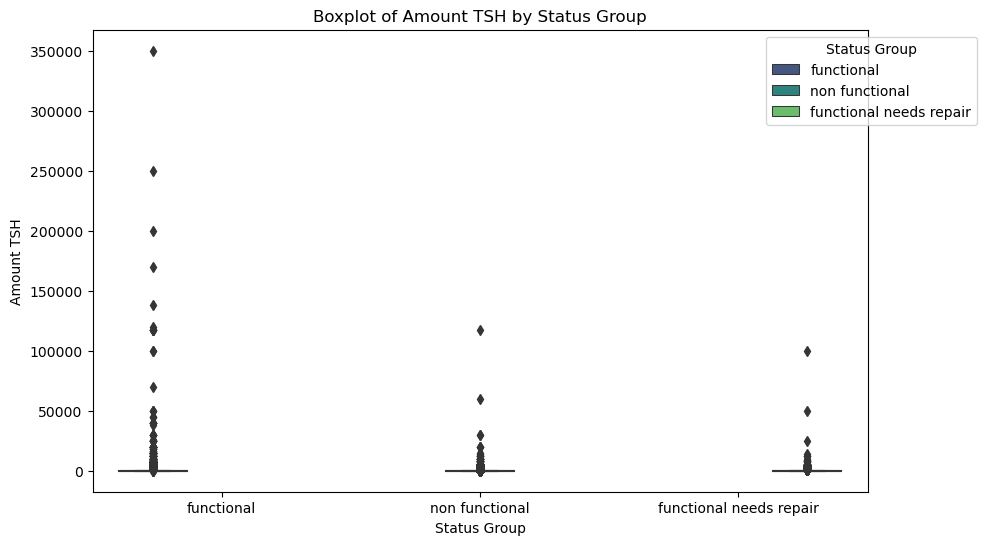

In [111]:
import seaborn as sns
# Selecting a few features for pairwise plots
water_table['amount_tsh'] = water_table['amount_tsh'].astype(float)

#water_table_filter = water_table[water_table["amount_tsh"] < 25000 ]
plt.figure(figsize=(10, 6))  
sns.boxplot(x="status_group", y="amount_tsh", data=water_table, hue="status_group", palette="viridis")
plt.xlabel("Status Group")
plt.ylabel("Amount TSH")
plt.title("Boxplot of Amount TSH by Status Group")
plt.legend(title="Status Group", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

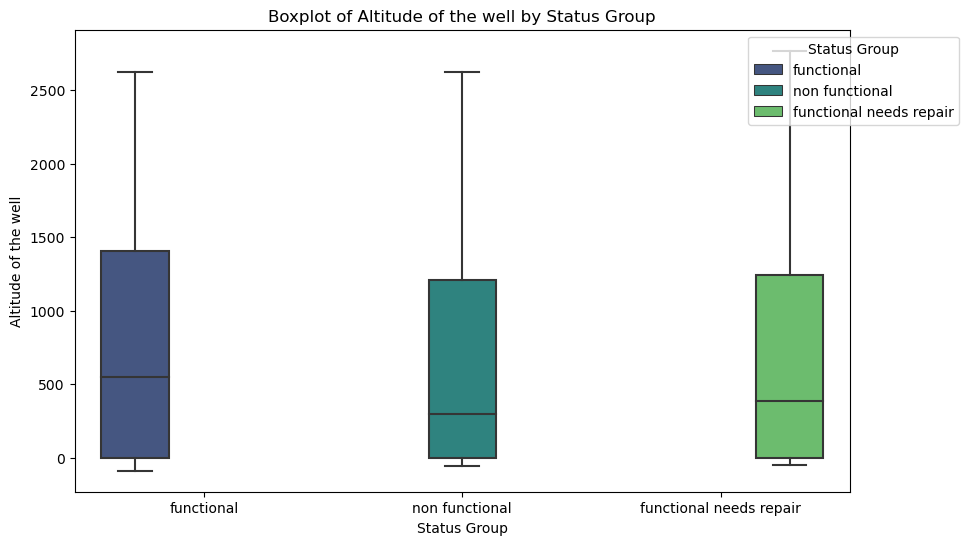

In [112]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x="status_group", y="gps_height", data=water_table, hue="status_group", palette="viridis")
plt.xlabel("Status Group")
plt.ylabel("Altitude of the well")
plt.title("Boxplot of Altitude of the well by Status Group")
plt.legend(title="Status Group", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

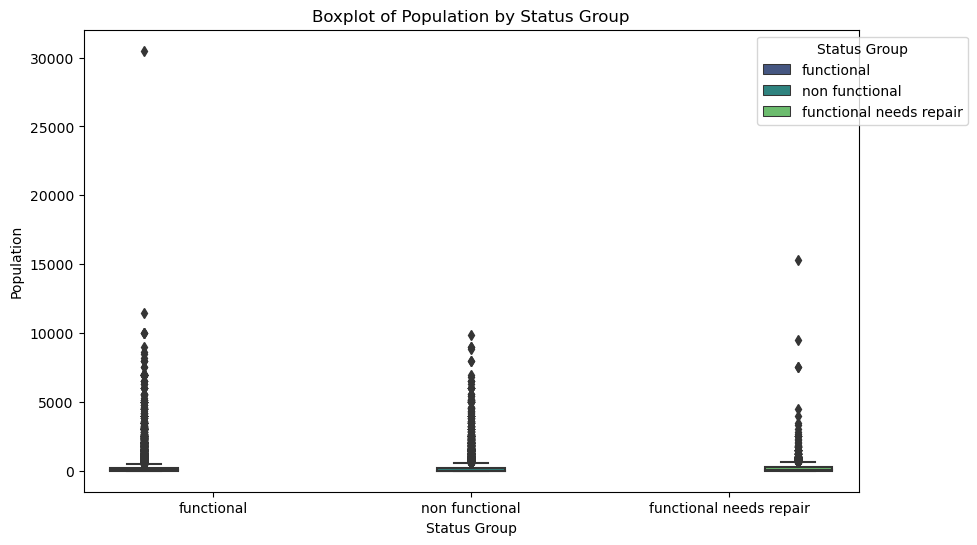

In [113]:
plt.figure(figsize=(10, 6))  
sns.boxplot(x="status_group", y="population", data=water_table, hue="status_group", palette="viridis")
plt.xlabel("Status Group")
plt.ylabel("Population")
plt.title("Boxplot of Population by Status Group")
plt.legend(title="Status Group", loc="upper right", bbox_to_anchor=(1.15, 1))
plt.show()

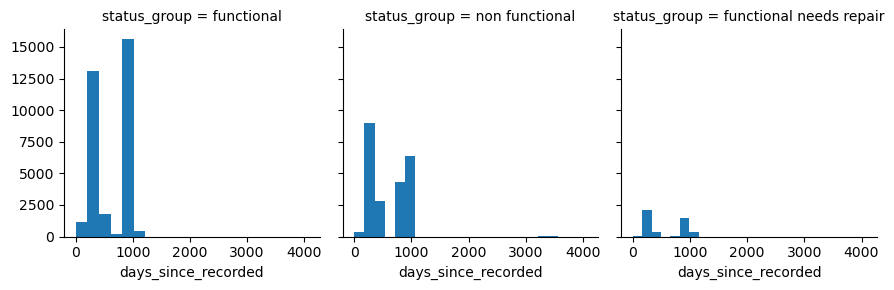

In [114]:
g = sns.FacetGrid(water_table, col='status_group')
g.map(plt.hist, 'days_since_recorded', bins=20)

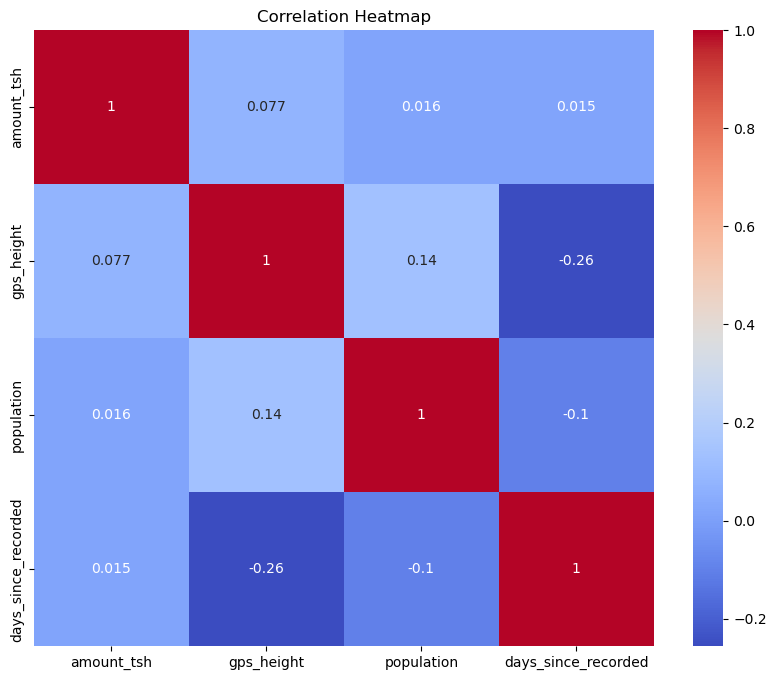

In [115]:
features_considered = ['amount_tsh', 'gps_height', 'population','days_since_recorded']
plt.figure(figsize=(10, 8))
sns.heatmap(water_table[features_considered].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



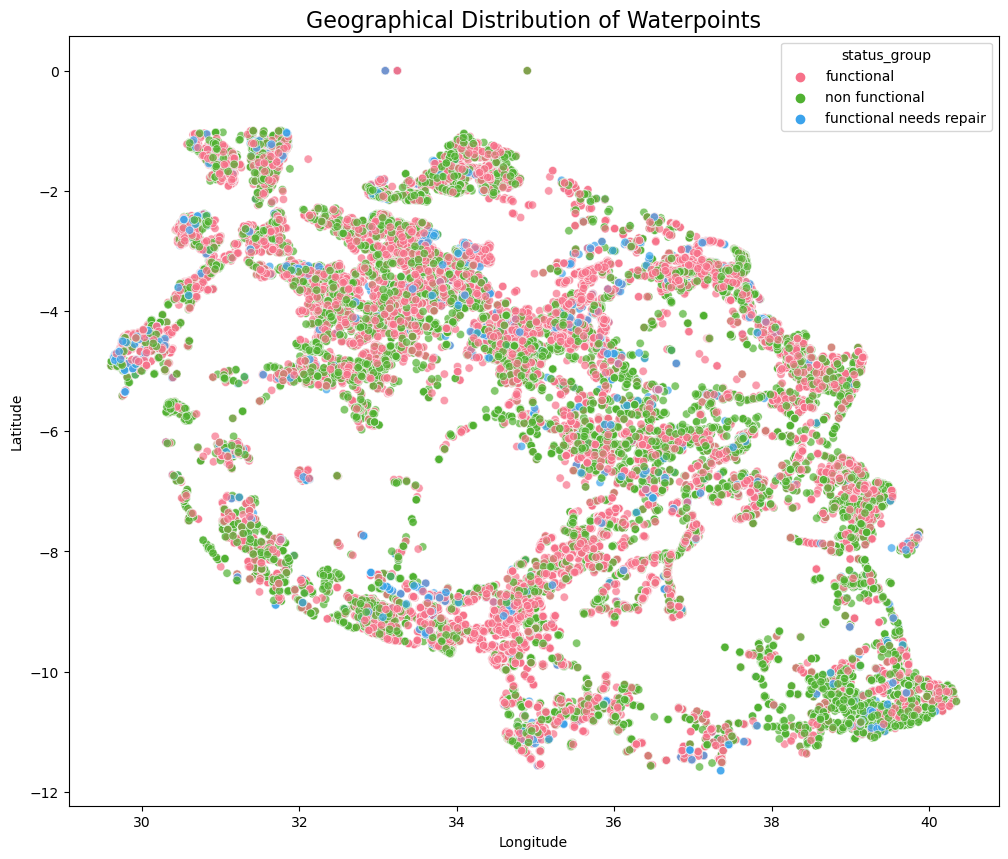

In [116]:

plt.figure(figsize=(12, 10))

status_groups = water_table['status_group'].unique()
custom_palette = {status: sns.color_palette("husl", len(status_groups))[i] for i, status in enumerate(status_groups)}

geo_data = water_table[(water_table['latitude'] < 0) & (water_table['longitude'] > 0)]

sns.scatterplot(x='longitude', y='latitude', hue='status_group', data=geo_data, palette=custom_palette, alpha=0.7)

plt.title('Geographical Distribution of Waterpoints', fontsize=16)
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()


In [117]:
water_table

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,Population_Range,Year_Range,days_since_recorded
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500,90s,995
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,Not Specified,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population between 100 to 500,10s,272
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,Population between 100 to 500,00s,281
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,Population less than 100,80s,309
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,Population less than 100,unknown,874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kiduruni,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,Water Board,Losaa Kia water supply,True,1999,gravity,gravity,gravity,water board,user-group,pay per bucket,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,Population between 100 to 500,90s,214
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,VWC,Ikondo electrical water sch,True,1996,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,Population less than 100,90s,941
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,Madungulu,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,VWC,NaN,False,0,swn 80,swn 80,handpump,vwc,user-group,pay monthly,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,Population less than 100,unknown,967
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,Rufiji,Mwiny

## Extraction of similar variables

In [118]:
water_table = water_table.drop(['date_recorded','funder','installer','wpt_name','num_private','subvillage','region_code','district_code'
                         ,'lga','ward','public_meeting','recorded_by','scheme_name','permit','construction_year','extraction_type_group',
                         'management','management_group','payment','payment_type','quality_group','quantity_group','source_type','source_class',
                         'waterpoint_type_group','Population_Range','population','days_since_recorded'],axis=1)


In [119]:
water_table

,id,amount_tsh,gps_height,longitude,latitude,basin,region,scheme_management,extraction_type,extraction_type_class,water_quality,quantity,source,waterpoint_type,status_group,Year_Range
0,69572,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,VWC,gravity,gravity,soft,enough,spring,communal standpipe,functional,90s
1,8776,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,Other,gravity,gravity,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s
2,34310,25.0,686,37.460664,-3.821329,Pangani,Manyara,VWC,gravity,gravity,soft,enough,dam,communal standpipe multiple,functional,00s
3,67743,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,VWC,submersible,submersible,soft,dry,machine dbh,communal standpipe multiple,non functional,80s
4,19728,0.0,0,31.130847,-1.825359,Lake Victoria,Kagera,NaN,gravity,gravity,soft,seasonal,rainwater harvesting,communal standpipe,functional,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,Pangani,Kilimanjaro,Water Board,gravity,gravity,soft,enough,spring,communal standpipe,functional,90s
59396,27263,4700.0,1212,35.249991,-9.070629,Rufiji,Iringa,VWC,gravity,gravity,soft,enough,river,communal standpipe,functional,90s
59397,37057,0.0,0,34.017087,-8.750434,Rufiji,Mbeya,VWC,swn 80,handpump,fluoride,enough,machine dbh,hand pump,functional,unknown
59398,31282,0.0,0,35.861315,-6.378573,Rufiji,Dodoma,VWC,nira/tanira,handpump,soft,insufficient,shallow well,hand pump,functional,unknown


## 6) Converting Categorical Features to Numeric

C:\Users\eduar\AppData\Local\Temp\ipykernel_17596\3529814446.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(water_table["num_status"] ,kde=False)


<Axes: xlabel='num_status'>

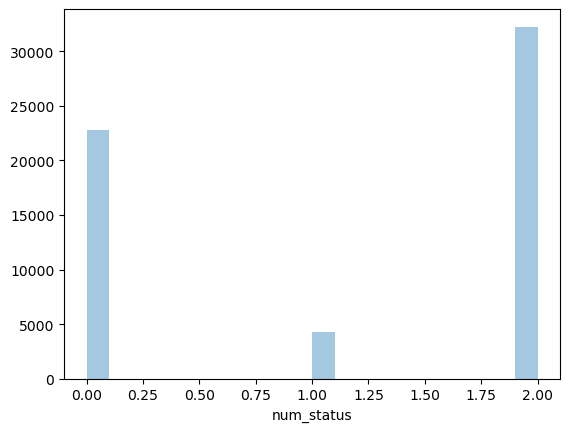

In [120]:
dicto_status = {"functional":2,"functional needs repair":1,"non functional":0}
water_table["num_status"] = water_table["status_group"].map(dicto_status)
sns.distplot(water_table["num_status"] ,kde=False)

In [121]:
water_table

,id,amount_tsh,gps_height,longitude,latitude,basin,region,scheme_management,extraction_type,extraction_type_class,water_quality,quantity,source,waterpoint_type,status_group,Year_Range,num_status
0,69572,6000.0,1390,34.938093,-9.856322,Lake Nyasa,Iringa,VWC,gravity,gravity,soft,enough,spring,communal standpipe,functional,90s,2
1,8776,0.0,1399,34.698766,-2.147466,Lake Victoria,Mara,Other,gravity,gravity,soft,insufficient,rainwater harvesting,communal standpipe,functional,10s,2
2,34310,25.0,686,37.460664,-3.821329,Pangani,Manyara,VWC,gravity,gravity,soft,enough,dam,communal standpipe multiple,functional,00s,2
3,67743,0.0,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,VWC,submersible,submersible,soft,dry,machine dbh,communal standpipe multiple,non functional,80s,0
4,19728,0.0,0,31.130847,-1.825359,Lake Victoria,Kagera,NaN,gravity,gravity,soft,seasonal,rainwater harvesting,communal standpipe,functional,unknown,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210,37.169807,-3.253847,Pangani,Kilimanjaro,Water Board,gravity,gravity,soft,enough,spring,communal standpipe,functional,90s,2
59396,27263,4700.0,1212,35.249991,-9.070629,Rufiji,Iringa,VWC,gravity,gravity,soft,enough,river,communal standpipe,functional,90s,2
59397,37057,0.0,0,34.017087,-8.750434,Rufiji,Mbeya,VWC,swn 80,handpump,fluoride,enough,machine dbh,hand pump,functional,unknown,2
59398,31282,0.0,0,35.861315,-6.378573,Rufiji,Dodoma,VWC,nira/tanira,handpump,soft,insufficient,shallow well,hand pump,functional,unknown,2


In [122]:
count_by_status = water_table.groupby('status_group')['num_status'].count()
percentage_by_status = (count_by_status / count_by_status.sum()) * 100
print(percentage_by_status)

status_group
functional                 54.308081
functional needs repair     7.267677
non functional             38.424242
Name: num_status, dtype: float64


## One-Hot Encoding for Categorical Variables

In [123]:
var_categ = water_table.select_dtypes(include='object').columns
print(var_categ)
len(var_categ)

Index(['basin', 'region', 'scheme_management', 'extraction_type',
       'extraction_type_class', 'water_quality', 'quantity', 'source',
       'waterpoint_type', 'status_group', 'Year_Range'],
      dtype='object')


11

In [124]:
from sklearn.preprocessing import OneHotEncoder

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_dataset = pd.DataFrame(OH_encoder.fit_transform(water_table[var_categ])).astype(np.int64)

OH_cols_dataset.index = water_table.index


OH_cols_dataset.columns = OH_encoder.get_feature_names_out(var_categ)

num_X_dataset = water_table.drop(var_categ, axis=1)

OH_water_table = pd.concat([num_X_dataset, OH_cols_dataset], axis=1)

OH_water_table.head()

C:\Users\eduar\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,amount_tsh,gps_height,longitude,latitude,num_status,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,scheme_management_Company,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,scheme_management_nan,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,status_group_functional,status_group_functional needs repair,status_group_non functional,Year_Range_00s,Year_Range_10s,Year_Range_60s,Year_Range_70s,Year_Range_80s,Year_Range_90s,Year_Range_unknown
0,69572,6000.0,1390,34.938093,-9.856322,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,8776,0.0,1399,34.698766,-2.147466,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,19728,0.0,0,31.130847,-1.825359,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [125]:
OH_water_table = OH_water_table.drop(['status_group_functional','status_group_functional needs repair','status_group_non functional'],axis=1)
OH_water_table

,id,amount_tsh,gps_height,longitude,latitude,num_status,basin_Internal,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Arusha,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,scheme_management_Company,scheme_management_Other,scheme_management_Parastatal,scheme_management_Private operator,scheme_management_SWC,scheme_management_Trust,scheme_management_VWC,scheme_management_WUA,scheme_management_WUG,scheme_management_Water Board,scheme_management_Water authority,scheme_management_nan,extraction_type_afridev,extraction_type_cemo,extraction_type_climax,extraction_type_gravity,extraction_type_india mark ii,extraction_type_india mark iii,extraction_type_ksb,extraction_type_mono,extraction_type_nira/tanira,extraction_type_other,extraction_type_other - mkulima/shinyanga,extraction_type_other - play pump,extraction_type_other - rope pump,extraction_type_other - swn 81,extraction_type_submersible,extraction_type_swn 80,extraction_type_walimi,extraction_type_windmill,extraction_type_class_gravity,extraction_type_class_handpump,extraction_type_class_motorpump,extraction_type_class_other,extraction_type_class_rope pump,extraction_type_class_submersible,extraction_type_class_wind-powered,water_quality_coloured,water_quality_fluoride,water_quality_fluoride abandoned,water_quality_milky,water_quality_salty,water_quality_salty abandoned,water_quality_soft,water_quality_unknown,quantity_dry,quantity_enough,quantity_insufficient,quantity_seasonal,quantity_unknown,source_dam,source_hand dtw,source_lake,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other,Year_Range_00s,Year_Range_10s,Year_Range_60s,Year_Range_70s,Year_Range_80s,Year_Range_90s,Year_Range_unknown
0,69572,6000.0,1390,34.938093,-9.856322,2,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,8776,0.0,1399,34.698766,-2.147466,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
2,34310,25.0,686,37.460664,-3.821329,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,67743,0.0,263,38.486161,-11.155298,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,19728,0.0,0,31.130847,-1.825359,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,1210

In [126]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(OH_water_table.dtypes)

id                                               int64
amount_tsh                                     float64
gps_height                                       int64
longitude                                      float64
latitude                                       float64
num_status                                       int64
basin_Internal                                   int64
basin_Lake Nyasa                                 int64
basin_Lake Rukwa                                 int64
basin_Lake Tanganyika                            int64
basin_Lake Victoria                              int64
basin_Pangani                                    int64
basin_Rufiji                                     int64
basin_Ruvuma / Southern Coast                    int64
basin_Wami / Ruvu                                int64
region_Arusha                                    int64
region_Dar es Salaam                             int64
region_Dodoma                                    int64
region_Iri

## 7) Split the Dataset into Training and Testing Sets

In [127]:
from sklearn.model_selection import train_test_split 
X = OH_water_table.drop(['id', 'num_status'], axis=1) 
Y = OH_water_table['num_status']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

## 8) Balance the Dataset

In [128]:
from imblearn.over_sampling import SMOTE


print('Class Distribution Before:')
print('Train Set')
print(Y_train.value_counts())

smote = SMOTE()
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

print('\nClass Distribution After:')
print('Train Set')
print(pd.Series(Y_train_resampled).value_counts())

Class Distribution Before:
Train Set
num_status
2    25802
0    18252
1     3466
Name: count, dtype: int64

Class Distribution After:
Train Set
num_status
2    25802
0    25802
1    25802
Name: count, dtype: int64


In [129]:
from sklearn.preprocessing import MinMaxScaler


X_train_resampled, X_test, Y_train_resampled, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 21)


scale = MinMaxScaler()


X_train_resampled = scale.fit_transform(X_train_resampled)
X_test = scale.transform(X_test)

## 9) Model, Predict and Solve

### Multinomial Logistic Regression

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

logreg_multinomial = LogisticRegression(solver="lbfgs", multi_class="multinomial",max_iter=9500)
logreg_multinomial.fit(X_train_resampled, Y_train_resampled)     
Y_pred1 = logreg_multinomial.predict(X_test)

acc_logreg_multinomial = round(logreg_multinomial.score(X_train_resampled,Y_train_resampled) * 100, 2)

print("Accuracy:", acc_logreg_multinomial)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred1))


Accuracy: 71.98

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.59      0.67      4614
           1       0.30      0.02      0.04       832
           2       0.70      0.90      0.78      6434

    accuracy                           0.72     11880
   macro avg       0.59      0.50      0.50     11880
weighted avg       0.70      0.72      0.69     11880



In [131]:
scores_logreg_multinomial = cross_val_score(logreg_multinomial, X_train_resampled, Y_train_resampled, cv=5)
scores_logreg_multinomial

array([0.72106481, 0.7165404 , 0.7170665 , 0.71475168, 0.72159091])

In [132]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_logreg_multinomial.mean(), scores_logreg_multinomial.std()))

0.72 accuracy with a standard deviation of 0.00


### Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier


random_forest = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')


random_forest.fit(X_train_resampled, Y_train_resampled)


Y_pred2 = random_forest.predict(X_test)


acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)

print("Accuracy:", acc_random_forest)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred2))


Accuracy: 79.44

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      4614
           1       0.45      0.38      0.41       832
           2       0.81      0.86      0.83      6434

    accuracy                           0.79     11880
   macro avg       0.69      0.67      0.68     11880
weighted avg       0.79      0.79      0.79     11880



In [134]:
scores_random_forest = cross_val_score(random_forest, X_train_resampled, Y_train_resampled, cv=5)
scores_random_forest

array([0.78261785, 0.78230219, 0.78103956, 0.78840488, 0.77872475])

In [135]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_random_forest.mean(), scores_random_forest.std()))

0.78 accuracy with a standard deviation of 0.00


### KNN

In [136]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_resampled, Y_train_resampled)
Y_pred3 = knn.predict(X_test)
acc_knn = round(knn.score(X_train_resampled, Y_train_resampled) * 100, 2)


print("Accuracy:", acc_knn)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred3))

Accuracy: 86.56

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      4614
           1       0.46      0.31      0.37       832
           2       0.80      0.84      0.82      6434

    accuracy                           0.77     11880
   macro avg       0.68      0.64      0.65     11880
weighted avg       0.76      0.77      0.77     11880



In [137]:
scores_knn = cross_val_score(knn, X_train_resampled, Y_train_resampled, cv=5)
scores_knn

array([0.76357323, 0.76630892, 0.77020202, 0.76904461, 0.76704545])

In [138]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_knn.mean(), scores_knn.std()))

0.77 accuracy with a standard deviation of 0.00


### Neural Networks (MLPClassifier)

In [139]:
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

mlp_classifier.fit(X_train_resampled, Y_train_resampled)

Y_pred4 = mlp_classifier.predict(X_test)

acc_mlp = round(mlp_classifier.score(X_train_resampled, Y_train_resampled) * 100, 2)


print("Accuracy:", acc_mlp)
print("\nClassification Report:\n", classification_report(Y_test, Y_pred4))

Accuracy: 82.29

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.73      0.77      4614
           1       0.46      0.23      0.31       832
           2       0.77      0.88      0.82      6434

    accuracy                           0.77     11880
   macro avg       0.68      0.61      0.63     11880
weighted avg       0.76      0.77      0.76     11880



In [140]:
scores_mlp_classifier = cross_val_score(mlp_classifier, X_train_resampled, Y_train_resampled, cv=5)
scores_mlp_classifier

array([0.75715488, 0.76094276, 0.76662458, 0.76851852, 0.76104798])

In [141]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_mlp_classifier.mean(), scores_mlp_classifier.std()))

0.76 accuracy with a standard deviation of 0.00


## Model Evaluation

In [142]:
models = pd.DataFrame({
    'Model': ['Multinomial Logistic Regression', 'Random Forest', 'KNN','Neural Networks'],
    'Score': [scores_logreg_multinomial.mean(), scores_random_forest.mean(), scores_knn.mean(), 
              scores_mlp_classifier.mean()]})
models.sort_values(by='Score', ascending=False)

,Model,Score
1,Random Forest,0.782618
2,KNN,0.767235
3,Neural Networks,0.762858
0,Multinomial Logistic Regression,0.718203


# Correlation Matrix

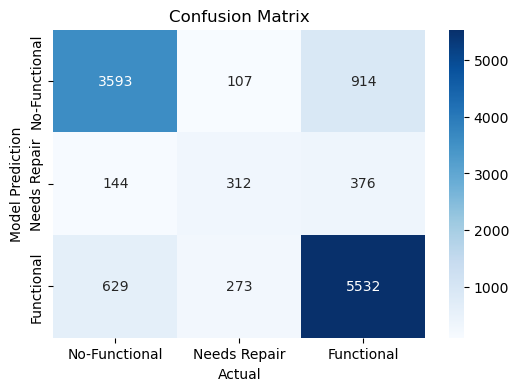

In [143]:

from sklearn.metrics import confusion_matrix

class_labels = ["No-Functional", "Needs Repair","Functional"]

# Confusion Matrix
confu_matrix = confusion_matrix(Y_test, Y_pred2)


plt.figure(figsize=(6, 4))
sns.heatmap(confu_matrix, annot=True, fmt="d", cmap="Blues", cbar=True, xticklabels=class_labels, yticklabels=class_labels)


plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Model Prediction')


plt.show()